In [2]:
#libraries
import tensorflow.keras 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input , Dense , Activation, Flatten , Conv2D , MaxPool2D ,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import categorical_crossentropy   #for binary classification only
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau  #for stop over fitting
from tensorflow.keras import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report ,confusion_matrix,ConfusionMatrixDisplay
import numpy as np 
import shutil
import os
import math
import seaborn as sns
import pandas as pd


In [3]:
main_direction_path = "/kaggle/input/ear-282image-7class-6class-aug-split/eardrum 282image 7class - 6class aug split"
print(main_direction_path)

/kaggle/input/ear-282image-7class-6class-aug-split/eardrum 282image 7class - 6class aug split


In [4]:
train_folder_path = main_direction_path + '/train/'
val_folder_path = main_direction_path + '/val/'
test_folder_path = main_direction_path + '/test/'

In [5]:
#for train
aom_path_train_path = train_folder_path + '/AOM/'
csom_path_train_path = train_folder_path +'/CSOM/'
earwax_path_train_path = train_folder_path + '/Earwax/'
normal_path_train_path = train_folder_path +'/Normal/'
others_path_train_path = train_folder_path + '/others/'
otitisexterna_path_train_path = train_folder_path +'/OtitisEksterna/'

#for train
aom_path_val_path = val_folder_path + '/AOM/'
csom_path_val_path = val_folder_path +'/CSOM/'
earwax_path_val_path = val_folder_path + '/Earwax/'
normal_path_val_path = val_folder_path +'/Normal/'
others_path_val_path = val_folder_path + '/others/'
otitisexterna_path_val_path = val_folder_path +'/OtitisEksterna/'

#for test
aom_path_test_path  = test_folder_path + '/AOM/'
csom_path_test_path  = test_folder_path +'/CSOM/'
earwax_path_test_path  = test_folder_path + '/Earwax/'
normal_path_test_path  = test_folder_path +'/Normal/'
others_path_test_path  = test_folder_path + '/others/'
otitisexterna_path_test_path  = test_folder_path +'/OtitisEksterna/'


In [6]:
totatl_train_images = (len(os.listdir(aom_path_train_path)) +
                       len(os.listdir(csom_path_train_path)) +
                       len(os.listdir(earwax_path_train_path)) +
                       len(os.listdir(normal_path_train_path)) +
                       len(os.listdir(others_path_train_path)) +
                       len(os.listdir(otitisexterna_path_train_path)))

print(totatl_train_images)

9090


In [7]:
totatl_val_images = (len(os.listdir(aom_path_val_path)) +
                       len(os.listdir(csom_path_val_path)) +
                       len(os.listdir(earwax_path_val_path)) +
                       len(os.listdir(normal_path_val_path)) +
                       len(os.listdir(others_path_val_path)) +
                       len(os.listdir(otitisexterna_path_val_path)))

print(totatl_val_images)

1816


In [8]:
totatl_test_images = (len(os.listdir(aom_path_test_path)) +
                       len(os.listdir(csom_path_test_path)) +
                       len(os.listdir(earwax_path_test_path)) +
                       len(os.listdir(normal_path_test_path)) +
                       len(os.listdir(others_path_test_path)) +
                       len(os.listdir(otitisexterna_path_test_path)))

print(totatl_test_images)

1216


In [9]:
classes_name = list(os.listdir(train_folder_path))
classes_name

['OtitisEksterna', 'CSOM', 'Earwax', 'Normal', 'AOM', 'others']

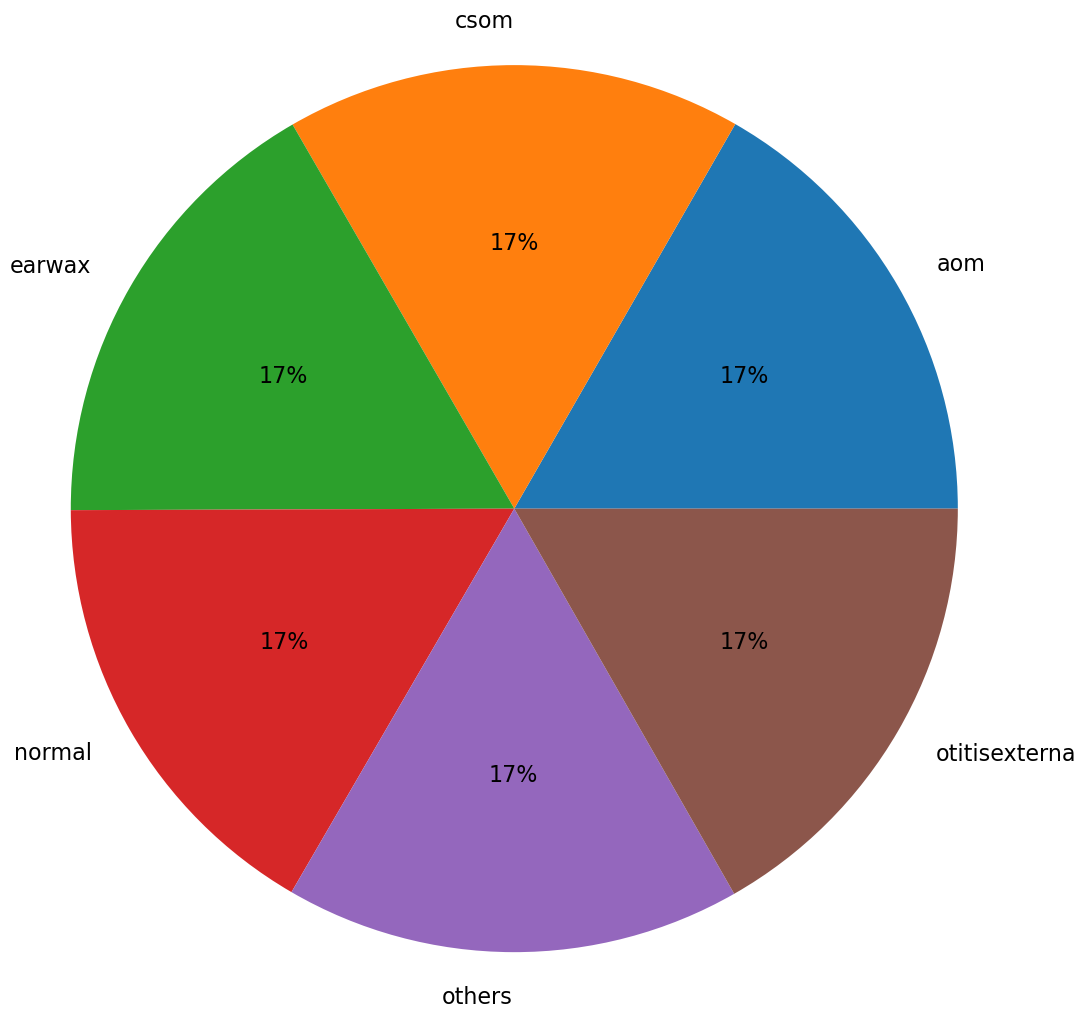

In [10]:
x = np.array([len(os.listdir(aom_path_train_path)),len(os.listdir(csom_path_train_path)),
              len(os.listdir(earwax_path_train_path)),len(os.listdir(normal_path_train_path)),
              len(os.listdir(others_path_train_path)),len(os.listdir(otitisexterna_path_train_path))])
labels = ['aom', 'csom', 'earwax', 'normal', 'others', 'otitisexterna']

plt.pie(x, labels = labels, autopct = '%.0f%%', radius= 3, textprops={'fontsize': 16})
plt.show()

In [11]:
"""The function ImageDataGenerator augments your image by iterating through 
image as your CNN is getting ready to process that image"""

img_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   #validation_split = 0.20,
                                   #preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
                                   horizontal_flip = True)



training_set = img_datagen.flow_from_directory(train_folder_path,
                                                     target_size = (224, 224),
                                                     batch_size = 32,
                                                     class_mode='categorical',
                                                    # subset="training"
                                                     )

validation_set = img_datagen.flow_from_directory(val_folder_path,   
                                                       
                                                       target_size=(224, 224),
                                                       batch_size=32,
                                                       class_mode='categorical',
                                                     #  subset="validation"
                                                       )

test_set = img_datagen.flow_from_directory(test_folder_path,
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          shuffle=False
                                      )

Found 9090 images belonging to 6 classes.
Found 1816 images belonging to 6 classes.
Found 1216 images belonging to 6 classes.


In [12]:
training_set.class_indices  

{'AOM': 0,
 'CSOM': 1,
 'Earwax': 2,
 'Normal': 3,
 'OtitisEksterna': 4,
 'others': 5}

In [13]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = tf.keras.applications.MobileNet(input_shape=None,
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")
x = base_model.output
#x = GlobalAveragePooling2D()(x)
#x = Dense(512, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

17225924/17225924 [==============================] - 0s 0us/step


In [14]:
# Print network structure
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [16]:
from tensorflow import keras
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

opt1=tf.keras.optimizers.Adam( learning_rate=0.02)

model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:

checkpoint=  ModelCheckpoint(filepath = 'eff_model.h5',monitor='val_accuracy',save_best_only=True,save_weights_only=True)
Earlystop = EarlyStopping(monitor='val_loss', mode='min',patience=10, min_delta=0.001)

In [18]:
#callbacks used in the training
checkpoint =ModelCheckpoint("Incp_model",monitor='val_accuracy',verbose=1,save_best_only =True ,save_weights_only = False,mode='auto')
anne=ReduceLROnPlateau(monitor="val_loss",factor=0.5,patience=10,verbose=1, mode="auto", min_lr=0.0000001)
early = EarlyStopping(monitor='val_accuracy', min_delta=0,patience=18,verbose=1,mode='auto')

In [19]:
## start Train/Test 
#no. of iteration
batch_size = 32
hist = model.fit(training_set, steps_per_epoch = training_set.samples//batch_size,validation_data = validation_set,
                 validation_steps = validation_set.samples//batch_size,
                 epochs = 100,
                 #callbacks=[checkpoint,early,anne]
                 )

Epoch 1/100


2023-07-12 17:01:17.787938: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


284/284 [==============================] - 221s 686ms/step - loss: 1.7161 - accuracy: 0.3771 - val_loss: 1.7322 - val_accuracy: 0.2651
Epoch 2/100
284/284 [==============================] - 178s 625ms/step - loss: 1.6334 - accuracy: 0.4023 - val_loss: 1.6012 - val_accuracy: 0.3968
Epoch 3/100
284/284 [==============================] - 162s 571ms/step - loss: 1.5197 - accuracy: 0.4556 - val_loss: 1.5483 - val_accuracy: 0.4213
Epoch 4/100
284/284 [==============================] - 178s 625ms/step - loss: 1.4100 - accuracy: 0.4940 - val_loss: 1.4267 - val_accuracy: 0.4654
Epoch 5/100
284/284 [==============================] - 174s 613ms/step - loss: 1.3805 - accuracy: 0.4862 - val_loss: 1.4116 - val_accuracy: 0.4554
Epoch 6/100
284/284 [==============================] - 177s 625ms/step - loss: 1.2493 - accuracy: 0.5370 - val_loss: 1.1975 - val_accuracy: 0.5491
Epoch 7/100
284/284 [==============================] - 173s 609ms/step - loss: 1.2394 - accuracy: 0.5306 - val_loss: 1.3052 - val_

38/38 [==============================] - 15s 391ms/step
Confusion Matrix
[[204   0   0   0   0   0]
 [  0 202   0   0   0   0]
 [  0   0 203   0   0   0]
 [  1   0   0 200   0   0]
 [  0   0   0   0 204   0]
 [  0   0   0   0   0 202]]
classification_Report
               precision    recall  f1-score   support

          AOM       1.00      1.00      1.00       204
         CSOM       1.00      1.00      1.00       202
       Earwax       1.00      1.00      1.00       203
       Normal       1.00      1.00      1.00       201
Otitisexterna       1.00      1.00      1.00       204
       Others       1.00      1.00      1.00       202

     accuracy                           1.00      1216
    macro avg       1.00      1.00      1.00      1216
 weighted avg       1.00      1.00      1.00      1216



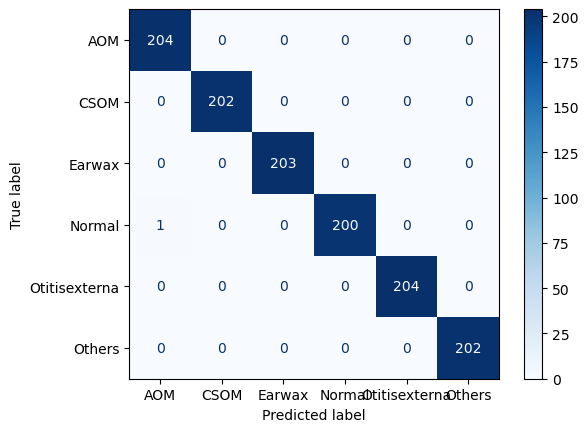

In [369]:
# Confusion Matrix  & Pres  & Recall   & F1-Score

target_names = ['AOM', 'CSOM', 'Earwax','Normal','Otitisexterna','Others']
label_names = [0,1,2,3,4,5]

Y_pred = model.predict(test_set)
y_pred_class = np.argmax(Y_pred ,  axis = 1)

cm = confusion_matrix(test_set.classes, y_pred_class, labels = label_names)


print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred_class))

print('classification_Report')
print(classification_report(test_set.classes, y_pred_class, target_names=target_names))

disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Blues, values_format = 'g')
plt.savefig("cf_mobile769975_9992test.png")
plt.show()

In [378]:
loss, acc = model.evaluate(test_set)

38/38 [==============================] - 17s 449ms/step - loss: 0.0140 - accuracy: 0.9992


In [379]:
model.save('mobile769975_9992test.h5')

In [380]:
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())
class_labels

['AOM', 'CSOM', 'Earwax', 'Normal', 'OtitisEksterna', 'others']

In [381]:
report = classification_report(true_classes, y_pred_class, target_names=class_labels)
print(report) 

                precision    recall  f1-score   support

           AOM       1.00      1.00      1.00       204
          CSOM       1.00      1.00      1.00       202
        Earwax       1.00      1.00      1.00       203
        Normal       1.00      1.00      1.00       201
OtitisEksterna       1.00      1.00      1.00       204
        others       1.00      1.00      1.00       202

      accuracy                           1.00      1216
     macro avg       1.00      1.00      1.00      1216
  weighted avg       1.00      1.00      1.00      1216



In [382]:
report_dic = classification_report(test_set.classes, y_pred_class, target_names=class_labels, output_dict=True)
print(report_dic)    

{'AOM': {'precision': 0.9951219512195122, 'recall': 1.0, 'f1-score': 0.9975550122249389, 'support': 204}, 'CSOM': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 202}, 'Earwax': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 203}, 'Normal': {'precision': 1.0, 'recall': 0.9950248756218906, 'f1-score': 0.9975062344139651, 'support': 201}, 'OtitisEksterna': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 204}, 'others': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 202}, 'accuracy': 0.9991776315789473, 'macro avg': {'precision': 0.9991869918699187, 'recall': 0.9991708126036484, 'f1-score': 0.9991768744398174, 'support': 1216}, 'weighted avg': {'precision': 0.9991816431322208, 'recall': 0.9991776315789473, 'f1-score': 0.9991776115222818, 'support': 1216}}


In [383]:
#geting predictions on test dataset
#y_pred = np.argmax(Y_pred, axis=1)
targetnames = ['AOM', 'CSOM', 'Earwax', 'Normal', 'OtitisEksterna', 'others']
#getting the true labels per image 
y_true = test_set.classes
#getting the predicted labels per image 
y_prob=Y_pred
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_true)

In [384]:
from sklearn.metrics import  precision_score, recall_score, accuracy_score,classification_report ,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc


In [385]:
print("Precision: "+ str(precision_score(y_true, y_pred_class, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred_class, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred_class)))
print("weighted Roc score: " + str(roc_auc_score(y_true,y_prob,multi_class='ovr',average='weighted')))

Precision: 0.9991816431322208
Recall: 0.9991776315789473
Accuracy: 0.9991776315789473
weighted Roc score: 0.9999991897848068


In [386]:
print("Precision: "+ str(precision_score(y_true, y_pred_class, average='macro')))
print("Recall: "+ str(recall_score(y_true, y_pred_class, average='macro')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred_class)))
print("Macro Roc score: " + str(roc_auc_score(y_true,y_prob,multi_class='ovr',average='macro')))

Precision: 0.9991869918699187
Recall: 0.9991708126036484
Accuracy: 0.9991776315789473
Macro Roc score: 0.9999991830666045


In [387]:
print("Precision: "+ str(precision_score(y_true, y_pred_class, average='micro')))
print("Recall: "+ str(recall_score(y_true, y_pred_class, average='micro')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred_class)))
tpr={}
fpr={}
roc_auc={}
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
print("Micro Roc score: " + str(roc_auc["micro"]))

Precision: 0.9991776315789473
Recall: 0.9991776315789473
Accuracy: 0.9991776315789473
Micro Roc score: 0.999999594226108


In [388]:
fpr = {}
tpr = {}
roc_auc = {}
for i in range(6):
    r = roc_auc_score(y_test[:, i], y_prob[:, i])
    print("The ROC AUC score of "+targetnames[i]+" is: "+str(r))

The ROC AUC score of AOM is: 1.0
The ROC AUC score of CSOM is: 1.0
The ROC AUC score of Earwax is: 1.0
The ROC AUC score of Normal is: 0.9999950983996275
The ROC AUC score of OtitisEksterna is: 0.9999999999999999
The ROC AUC score of others is: 1.0


In [389]:
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = dict()
for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_prob[:, i], drop_intermediate=False)
    roc_auc[i] = auc(fpr[i], tpr[i])

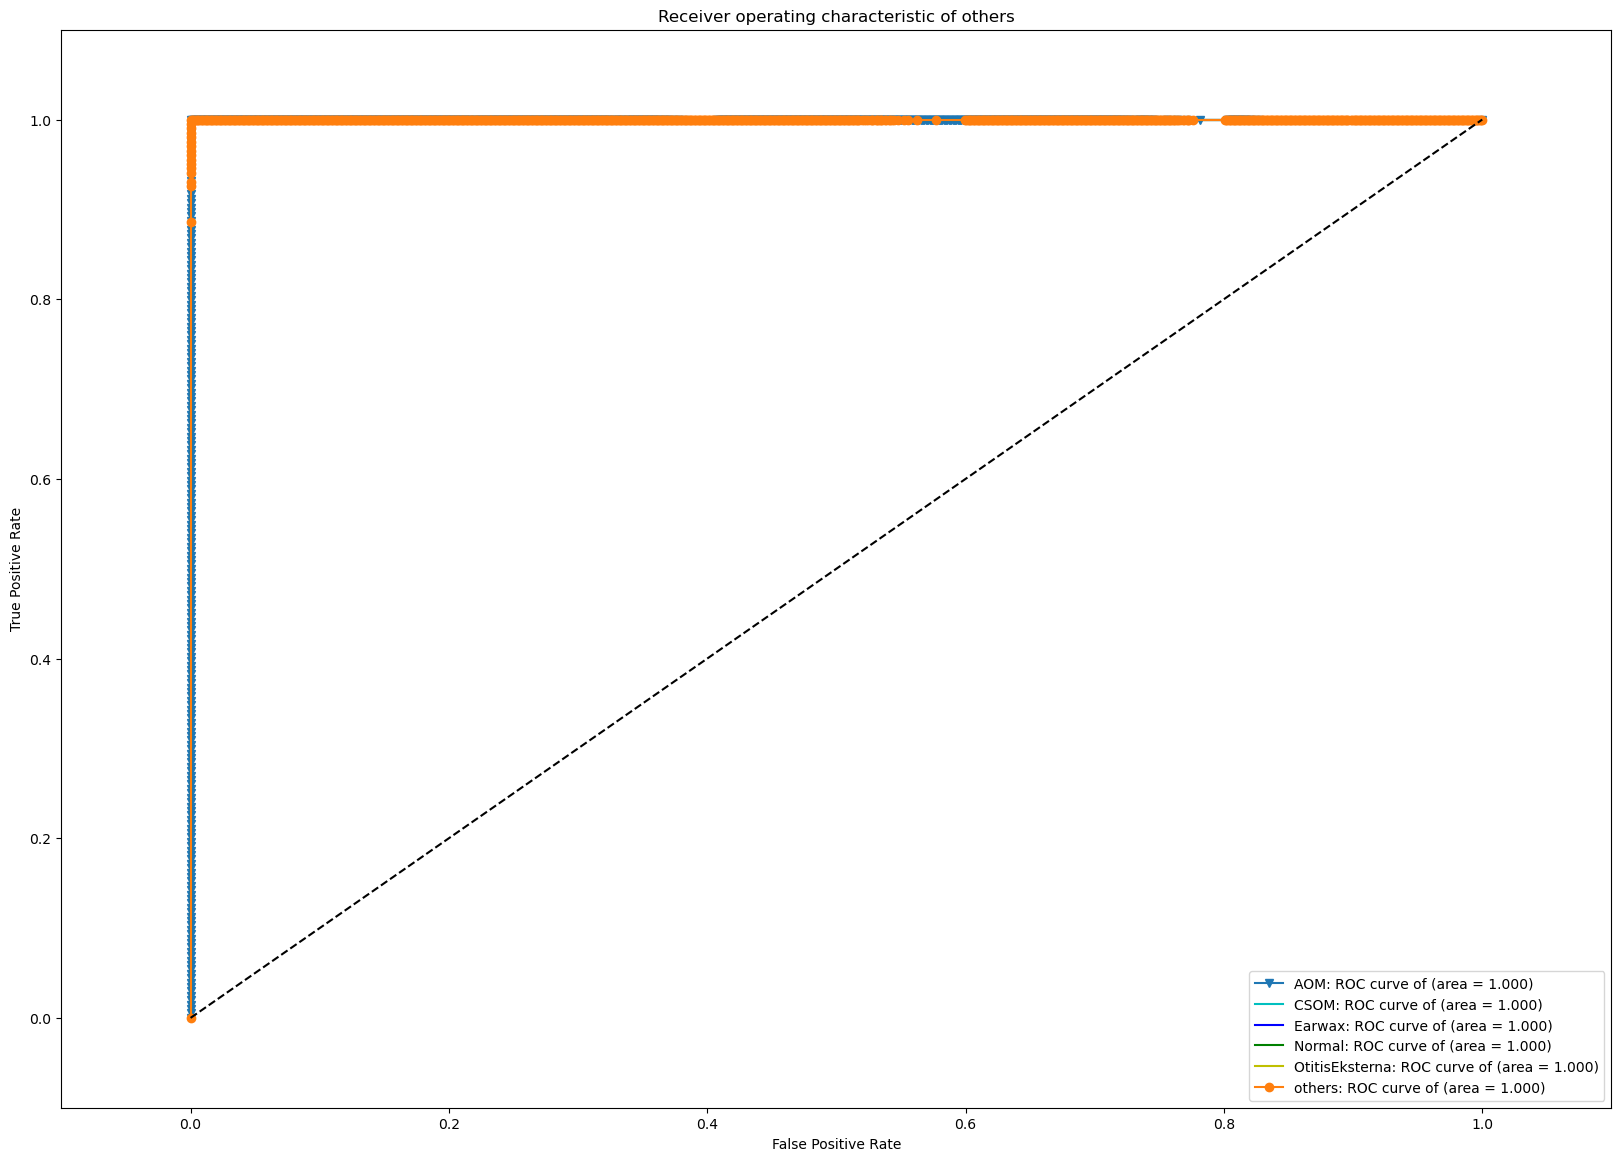

In [390]:
plt.figure(figsize=(20,14))

plt.plot(fpr[0], tpr[0],'v-',label='AOM: ROC curve of (area = %0.3f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1],'c',label='CSOM: ROC curve of (area = %0.3f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2],'b',label='Earwax: ROC curve of (area = %0.3f)' % roc_auc[2])
plt.plot(fpr[3], tpr[3],'g',label='Normal: ROC curve of (area = %0.3f)' % roc_auc[3])
plt.plot(fpr[4], tpr[4],'y',label='OtitisEksterna: ROC curve of (area = %0.3f)' % roc_auc[4])
plt.plot(fpr[5], tpr[5],'o-',label='others: ROC curve of (area = %0.3f)' % roc_auc[5])

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of %s'%targetnames[i])
plt.legend(loc="lower right")
plt.savefig("ROCmobile769975_9992test.png")
plt.show()

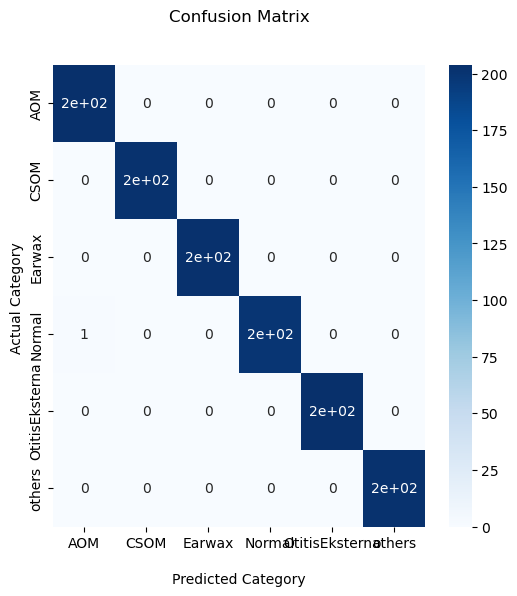

In [391]:
cf_matrix = confusion_matrix(true_classes, y_pred_class)

plt.figure(figsize=(6,6))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=True) 

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

## Display the visualization of the Confusion Matrix.
plt.savefig("cf2_mobile769975_9992test.png")
plt.show()

In [392]:
Classification_report = pd.DataFrame.from_dict(report_dic)

In [393]:
Classification_report

,AOM,CSOM,Earwax,Normal,OtitisEksterna,others,accuracy,macro avg,weighted avg
precision,0.995122,1.0,1.0,1.000000,1.0,1.0,0.999178,0.999187,0.999182
recall,1.000000,1.0,1.0,0.995025,1.0,1.0,0.999178,0.999171,0.999178
f1-score,0.997555,1.0,1.0,0.997506,1.0,1.0,0.999178,0.999177,0.999178
support,204.000000,202.0,203.0,201.000000,204.0,202.0,0.999178,1216.000000,1216.000000


In [394]:
Classification_report.to_csv('classification_report_mobile769975_9992test.csv', index = True)

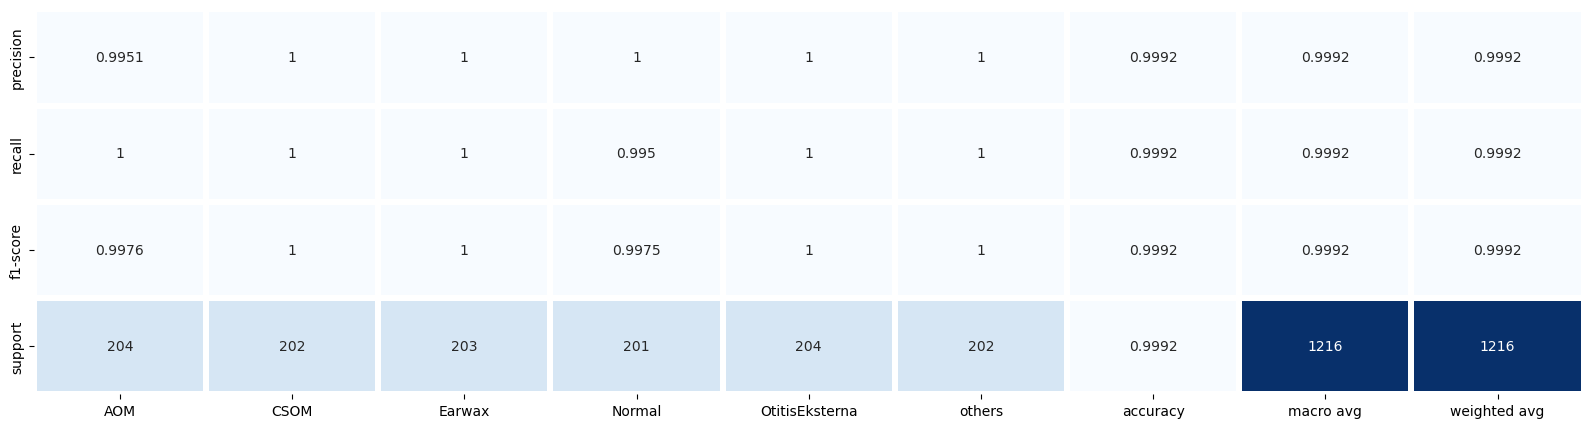

In [395]:
import seaborn as sns

df = pd.read_csv('/kaggle/working/classification_report_mobile769975_9992test.csv', delimiter=',',index_col=[0])
plt.figure(figsize=(20,5))
sns.heatmap(df,cbar=False, annot=True, fmt=".4g", cmap= 'Blues', linewidths = 3 )
plt.savefig("cr_mobile769975_9992test.png")

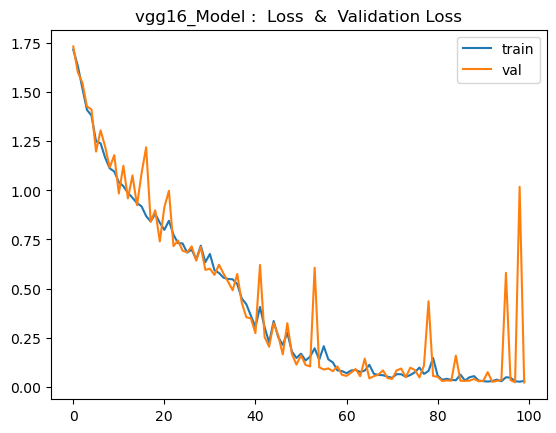

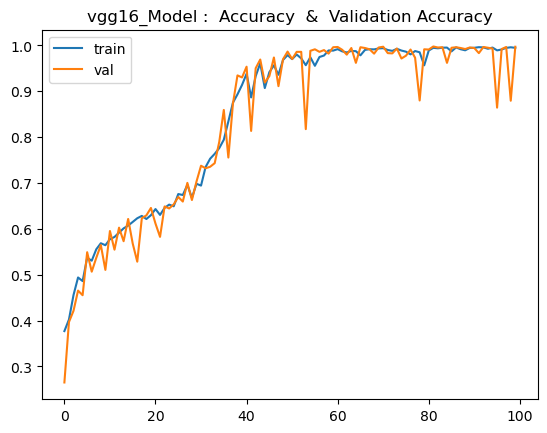